# exercises

1. Create two CSV files: one with 256 rows and another with 1050 rows, containing randomly generated values of 'real' or 'fake'.  

2. Combine the two CSV files into a single file in the Kaggle 'submission' format (remember that the index must be labeled as 'Id' and the predictions as 'Prediction').  

3. Make a submission to Kaggle, resolve any potential errors, and check the score obtained.  

4. Free time: Use machine learning to generate the CSV files for each prlem.  

In [1]:
## some help... 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [2]:
dfa_train = pd.read_csv('./train_A_derma.csv')

dfa_train

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,Large,Doughnuts consumption,Fake/Real
0,0,1.0,-1.27713,4.0,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.234125,real
1,1,NaN,-1.84207,3.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.216756,real
2,2,NaN,-1.82290,3.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,1.264342,real
3,3,1.0,-1.36049,3.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.126842,real
4,4,NaN,NaN,2.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.198014,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,NaN,-2.16422,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.217172,fake
593,593,0.0,NaN,3.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.165209,real
594,594,0.0,-1.03834,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.165564,real
595,595,0.0,NaN,NaN,1.0,1.0,NaN,0.0,0.0,1.0,0.0,1.001725,real


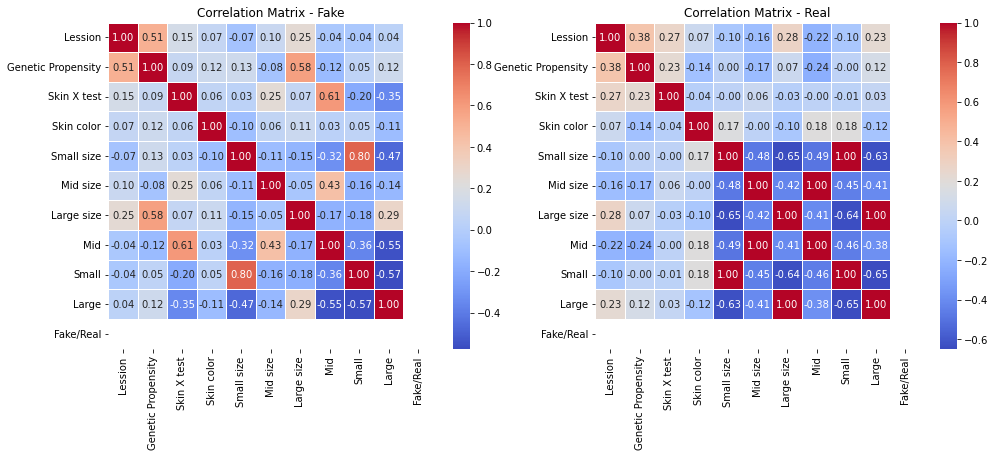

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

dfa_train = dfa_train.drop(['Doughnuts consumption'], axis=1)
dfa_train = dfa_train.drop(['Id'], axis=1)
dfa_train["Fake/Real"] = dfa_train["Fake/Real"].map({"fake": 0, "real": 1})

# Separate the data
df_fake = dfa_train[dfa_train["Fake/Real"] == 0]
df_real = dfa_train[dfa_train["Fake/Real"] == 1]

# Compute correlation matrices
corr_fake = df_fake.corr()
corr_real = df_real.corr()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Fake
sns.heatmap(corr_fake, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Matrix - Fake")

# Heatmap for Real
sns.heatmap(corr_real, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Matrix - Real")

# Show the plots
plt.show()

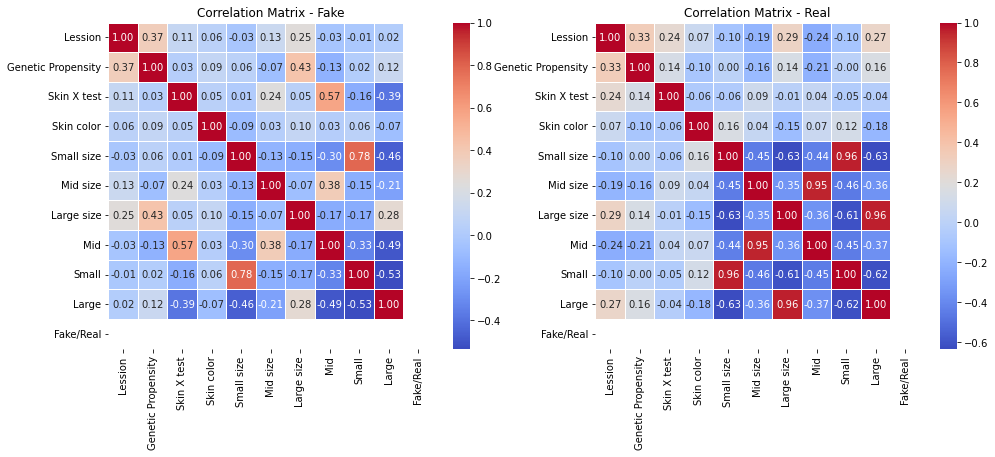

In [4]:
from sklearn.impute import KNNImputer
# Create a KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
dfa_train = pd.DataFrame(imputer.fit_transform(dfa_train), columns=dfa_train.columns)


# Separate the data
df_fake = dfa_train[dfa_train["Fake/Real"] == 0]
df_real = dfa_train[dfa_train["Fake/Real"] == 1]

# Compute correlation matrices
corr_fake = df_fake.corr()
corr_real = df_real.corr()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Fake
sns.heatmap(corr_fake, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Matrix - Fake")

# Heatmap for Real
sns.heatmap(corr_real, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Matrix - Real")

# Show the plots
plt.show()

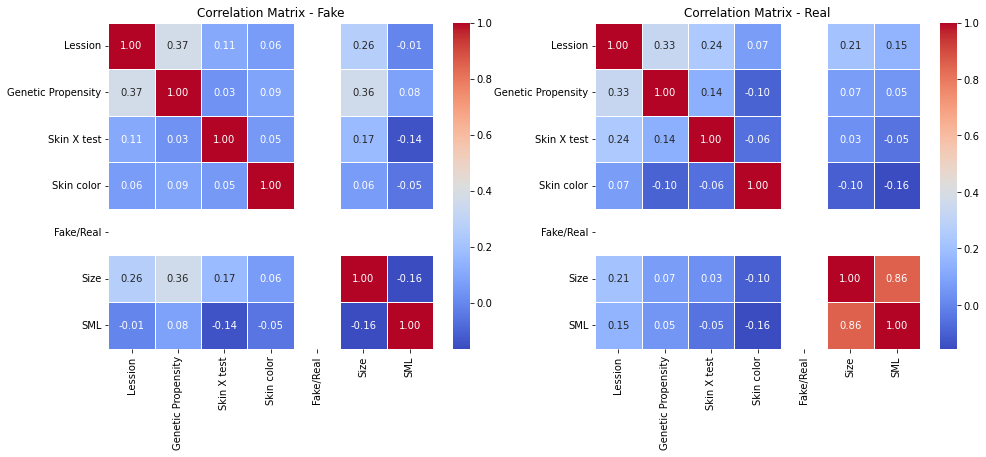

In [5]:
dfa_trainres = dfa_train['Fake/Real']

dfa_train['Mid size'] = dfa_train['Mid size']*2
dfa_train['Large size'] = dfa_train['Large size']*3
dfa_train['Size'] = dfa_train[['Small size','Mid size','Large size']].sum(axis=1)
dfa_train.drop(['Large size', 'Mid size', 'Small size'], axis=1, inplace=True)

dfa_train['Mid'] = dfa_train['Mid']*2
dfa_train['Large'] = dfa_train['Large']*3
dfa_train['SML'] = dfa_train[['Small','Mid','Large']].sum(axis=1)
dfa_train.drop(['Large', 'Mid', 'Small'], axis=1, inplace=True)

# Separate the data
df_fake = dfa_train[dfa_train["Fake/Real"] == 0]
df_real = dfa_train[dfa_train["Fake/Real"] == 1]

# Compute correlation matrices
corr_fake = df_fake.corr()
corr_real = df_real.corr()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Fake
sns.heatmap(corr_fake, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Matrix - Fake")

# Heatmap for Real
sns.heatmap(corr_real, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Matrix - Real")

# Show the plots
plt.show()


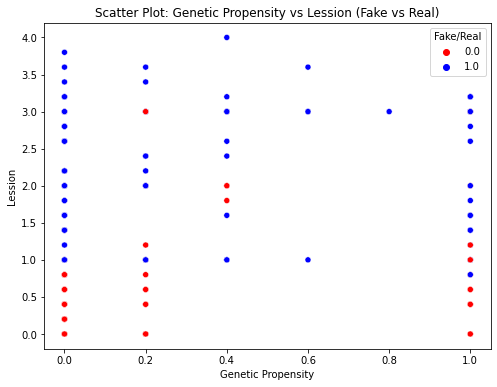

In [6]:
# Define custom colors
palette = {0: "red", 1: "blue"}

# Scatter plot with color distinction
plt.figure(figsize=(8, 6))
sns.scatterplot(
    y=dfa_train["Size"], 
    x=dfa_train["Lession"], 
    hue=dfa_train["Fake/Real"], 
    palette=palette
)

# Labels and title
plt.xlabel("Genetic Propensity")
plt.ylabel("Lession")
plt.title("Scatter Plot: Genetic Propensity vs Lession (Fake vs Real)")
plt.legend(title="Fake/Real")

# Show the plot
plt.show()

Train matrix:


C:\Users\juanc\AppData\Local\Temp/ipykernel_23128/4196247620.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_23128/4196247620.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


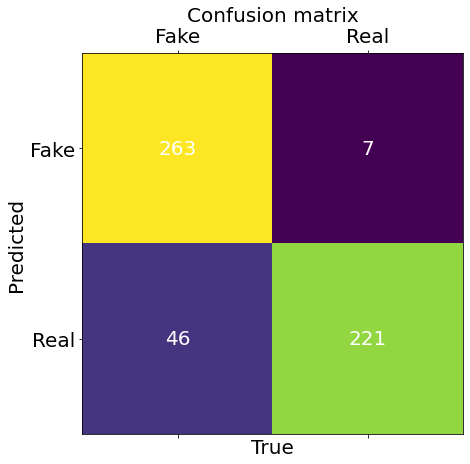

classification accuracy: 0.9
Validation matrix:


C:\Users\juanc\AppData\Local\Temp/ipykernel_23128/4196247620.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_23128/4196247620.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


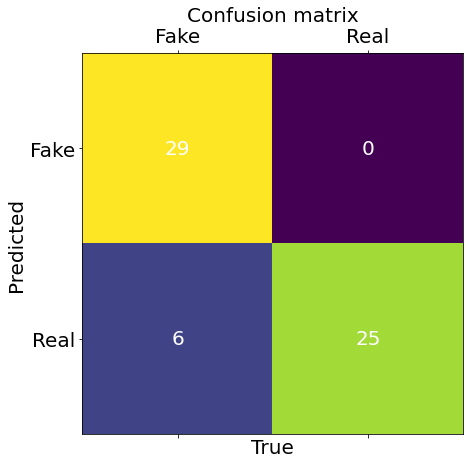

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        29
         1.0       1.00      0.81      0.89        31

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60

F-Measure 0.8928571428571428


In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# Drop the column from the original DataFrame
dfa_train = dfa_train.drop(['Fake/Real'], axis=1)

scaler = StandardScaler()

import matplotlib.pyplot as plt
trainAx = dfa_train.values
trainAy = dfa_trainres.values

x_train, x_test, y_train, y_test = train_test_split(trainAx, trainAy, test_size=0.1, random_state=90) 


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

def draw_confusion(y,yhat,labels):
    cm = confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()


def Bayesian_Report(train_data, train_labels, val_data, val_labels):

    # Initialize logistic regression model
    model = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=6,min_samples_split=2)
    model.fit(train_data,train_labels)
    
    y_hat2 = model.predict(train_data)
    y_hat = model.predict(val_data)
    print("Train matrix:")
    draw_confusion(train_labels,y_hat2,['Fake', 'Real'])
    print ("classification accuracy:",accuracy_score(y_hat, val_labels))
    print("Validation matrix:")
    draw_confusion(val_labels,y_hat,['Fake', 'Real'])
    print ("Classification Report:")
    print (classification_report(y_hat,np.array(val_labels)))
    
    score_2 = f1_score(val_labels, y_hat, average = 'binary')
    print('F-Measure', score_2)
    
Bayesian_Report(x_train, y_train,  x_test,   y_test)

In [8]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [ 2, 3, 4],
    'min_samples_leaf': [ 4, 6, 8, 10, 12, 14, 15,  20]
}
# Initialize GridSearchCV
mode = tree.DecisionTreeClassifier( )
grid_search = GridSearchCV(estimator=mode, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

model = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=6,min_samples_split=2)
# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, trainAx[:,:], trainAy[:], cv=kf)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

model.fit(trainAx[:,:], trainAy[:])

Cross-validation scores: [0.93333333 0.96666667 0.85       0.86666667 0.93333333 0.95
 0.9        0.94915254 0.81355932 0.84745763]
Mean accuracy: 0.9010169491525423


DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

No handles with labels found to put in legend.


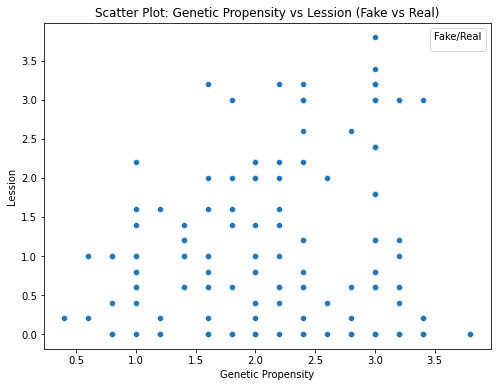

In [10]:
dfa_test = pd.read_csv('./test_A_derma.csv')

# Drop the column from the original DataFrame
dfa_test = dfa_test.drop(['Id'], axis=1)
dfa_test = dfa_test.drop(['Doughnuts consumption'], axis=1)

# Create a KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
dfa_test = pd.DataFrame(imputer.fit_transform(dfa_test), columns=dfa_test.columns)


dfa_test['Mid size'] = dfa_test['Mid size'] * 2
dfa_test['Large size'] = dfa_test['Large size'] * 3
dfa_test['Size'] = dfa_test[['Small size', 'Mid size', 'Large size']].sum(axis=1)
dfa_test.drop(['Large size', 'Mid size', 'Small size'], axis=1, inplace=True)

dfa_test['Mid'] = dfa_test['Mid'] * 2
dfa_test['Large'] = dfa_test['Large'] * 3
dfa_test['SML'] = dfa_test[['Small', 'Mid', 'Large']].sum(axis=1)
dfa_test.drop(['Large', 'Mid', 'Small'], axis=1, inplace=True)


testAx = dfa_test.values

# Scatter plot with color distinction
plt.figure(figsize=(8, 6))
sns.scatterplot(
    y=dfa_test["Size"], 
    x=dfa_test["SML"]
)

# Labels and title
plt.xlabel("Genetic Propensity")
plt.ylabel("Lession")
plt.title("Scatter Plot: Genetic Propensity vs Lession (Fake vs Real)")
plt.legend(title="Fake/Real")

# Show the plot
plt.show()

In [14]:
yhat = model.predict(testAx[:,:])
label_mapping = {0: "fake", 1: "real"}
yhat= np.vectorize(label_mapping.get)(yhat)
yhat

array(['fake', 'real', 'fake', 'real', 'real', 'fake', 'real', 'real',
       'fake', 'fake', 'real', 'fake', 'fake', 'real', 'real', 'fake',
       'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'fake',
       'fake', 'fake', 'real', 'fake', 'real', 'fake', 'fake', 'fake',
       'real', 'real', 'real', 'fake', 'fake', 'fake', 'fake', 'real',
       'fake', 'fake', 'real', 'real', 'fake', 'real', 'real', 'real',
       'fake', 'fake', 'real', 'real', 'fake', 'real', 'real', 'fake',
       'fake', 'fake', 'fake', 'fake', 'real', 'fake', 'fake', 'fake',
       'real', 'real', 'real', 'real', 'real', 'fake', 'fake', 'fake',
       'fake', 'real', 'fake', 'fake', 'fake', 'real', 'real', 'real',
       'real', 'fake', 'real', 'real', 'real', 'fake', 'real', 'fake',
       'fake', 'fake', 'fake', 'fake', 'real', 'real', 'real', 'fake',
       'real', 'fake', 'real', 'real', 'fake', 'real', 'real', 'fake',
       'real', 'fake', 'fake', 'real', 'real', 'fake', 'real', 'fake',
      

In [15]:
data1= pd.DataFrame(yhat)
data1.index.name = 'Id'

data1.rename(columns={data1.columns[0]: 'Prediction'}, inplace=True)
data1

,Prediction
Id,
0,fake
1,real
2,fake
3,real
4,real
...,...
251,fake
252,real
253,real


In [16]:
data2 = pd.read_csv('./submission_news.csv')
data2= data2.drop(['Id'], axis=1)
data2

,Prediction
0,fake
1,fake
2,real
3,fake
4,real
...,...
1045,real
1046,real
1047,real
1048,fake


In [17]:
df3 = pd.concat([data1,data2], ignore_index = True)
df3.index.name = 'Id'
df3

,Prediction
Id,
0,fake
1,real
2,fake
3,real
4,real
...,...
1301,real
1302,real
1303,real


In [18]:
df3.to_csv('submission_file.csv',sep=',',header=True)